# 基于细粒度特征的热红外目标追踪 Part 1

## 研究热红外图像与 RGB 图像的区别，分析热红外图像的特有视觉特性

热红外图像与 RGB 图像最明显的差别在于热红外图像不包含颜色信息且不受照明源的影响。例如，热红外图像能够清晰的显示出在照明源暗处的目标，而 RGB 图像可能会因为照明原因出现追踪目标“消失”的错觉。热红外图像与 RGB 的图像之间包含了众多异同点，这一部分的目标主要在于发掘异同点，并且从粗粒度、细粒度两方面详细分析热红外图像特有的视觉特性。

该部分所选用数据集来自日本东京大学多光谱图像识别项目下多光谱目标检测数据集中的RGB图像集与中波红外图像集，二者为同一条件下在同一场景使用不同波段的光进行拍摄，因此非常适合用于研究热红外图像与 RGB 图像的异同点

*Reference:* 

Takumi K, Watanabe K, Ha Q, et al. Multispectral object detection for autonomous vehicles[C]//Proceedings of the on Thematic Workshops of ACM Multimedia 2017. 2017: 35-43.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

从**粗粒度**方面来看，

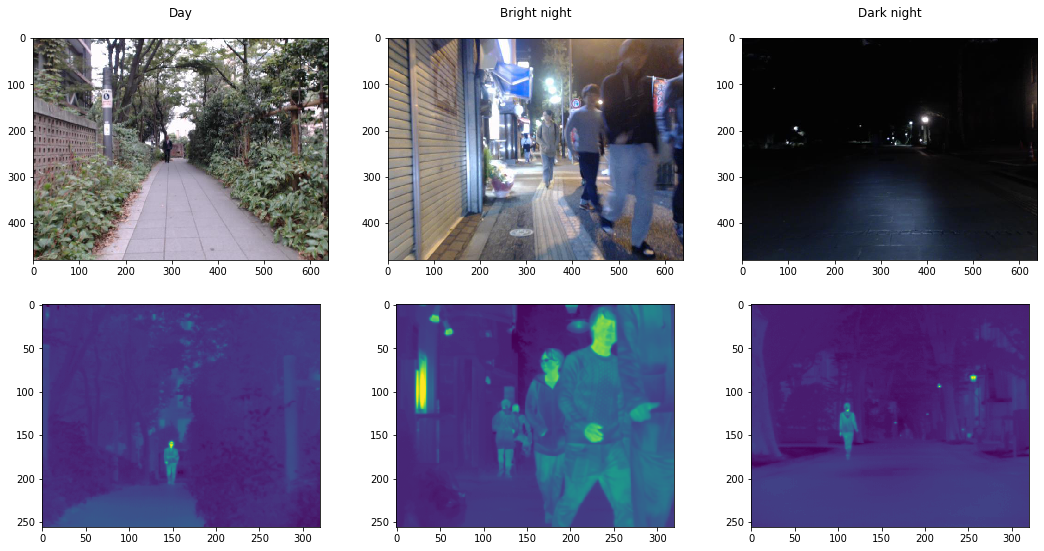

In [2]:
# 分别加载rgb图像与tir图像
im_dark_r = plt.imread('./data/RGB/RGB001.png')
im_bright_r = plt.imread('./data/RGB/RGB002.png')
im_day_r = plt.imread('./data/RGB/RGB003.png')
im_dark_t = plt.imread('./data/TIR/TIR001.png')
im_bright_t = plt.imread('./data/TIR/TIR002.png')
im_day_t = plt.imread('./data/TIR/TIR003.png')

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (18, 9))

ax[0][0].imshow(im_day_r)
ax[0][0].set_title("Day\n")
ax[1][0].imshow(im_day_t)

ax[0][1].imshow(im_bright_r)
ax[0][1].set_title("Bright night\n")
ax[1][1].imshow(im_bright_t)

ax[0][2].imshow(im_dark_r)
ax[0][2].set_title("Dark night\n")
ax[1][2].imshow(im_dark_t)

plt.savefig('p1-1')
plt.show()

从图像的成像效果来看，在光线强度较弱或无照明源的情况下，热红外图像能够准确的反映出目标（例如图中的行人）的位置，而 RGB 图像缺出现目标“消失”的情况。在光线充足的情况下，二者都能够较为清晰的反映出目标的位置。图中明亮的人行步道两侧商店灯饰和路灯作为光源在两张照片都尤为明显。光源也是热源。因而在热红外图片中能够观察出灯管与灯泡的形状， RGB 图片由于对光源敏感发光体的形状较为模糊。这展现出热红外图像的一个独特特征：对热源敏感。此外，由图可较为明显地看出热红外图像具有分辨率较低、视觉效果较为模糊的特征。

从**细粒度**方面来看，

In [3]:
print(im_day_r.shape)
print(im_dark_r.shape)
print(im_bright_r.shape)
print(im_day_t.shape)
print(im_dark_t.shape)
print(im_bright_t.shape)

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(256, 320)
(256, 320)
(256, 320)


通常，RGB 图像由三通道（红光、绿光、蓝光）组成，而热红外图像仅由单通道组成。由于不包含颜色信息，热红外图像可视为灰度图像进行后续处理。

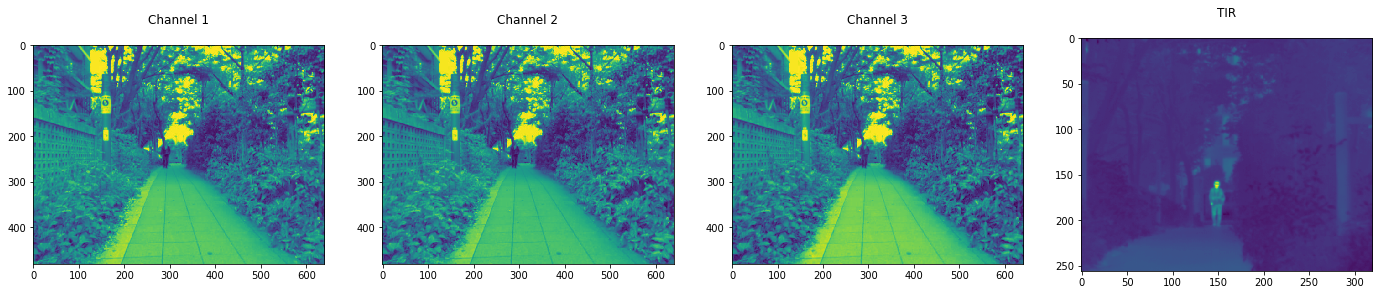

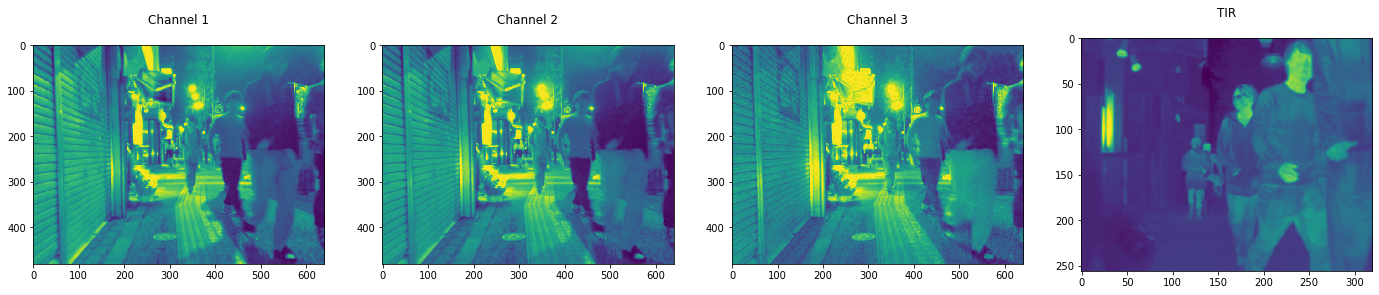

In [4]:
def pick_channel(im, h, w, c):
    # r = 0, g = 1, b = 2
    picker = np.zeros((h, w), dtype=np.float)
    for i in range(h):
        for j in range(w):
            picker[i][j] = im[i][j][c]
    
    return picker

channel_day_r = pick_channel(im_day_r, 480, 640, 0)
channel_day_g = pick_channel(im_day_r, 480, 640, 1)
channel_day_b = pick_channel(im_day_r, 480, 640, 2)
channel_night_r = pick_channel(im_bright_r, 480, 640, 0)
channel_night_g = pick_channel(im_bright_r, 480, 640, 1)
channel_night_b = pick_channel(im_bright_r, 480, 640, 2)

fig_day, ax_day = plt.subplots(nrows=1, ncols=4, figsize = (24, 8))
ax_day[0].imshow(channel_day_r)
ax_day[0].set_title("Channel 1\n")
ax_day[1].imshow(channel_day_g)
ax_day[1].set_title("Channel 2\n")
ax_day[2].imshow(channel_day_b)
ax_day[2].set_title("Channel 3\n")
ax_day[3].imshow(im_day_t)
ax_day[3].set_title("TIR\n")
plt.savefig('p1-2-1')
plt.show()
fig_night, ax_night = plt.subplots(nrows=1, ncols=4, figsize = (24, 6))
ax_night[0].imshow(channel_night_r)
ax_night[0].set_title("Channel 1\n")
ax_night[1].imshow(channel_night_g)
ax_night[1].set_title("Channel 2\n")
ax_night[2].imshow(channel_night_b)
ax_night[2].set_title("Channel 3\n")
ax_night[3].imshow(im_bright_t)
ax_night[3].set_title("TIR\n")
plt.savefig('p1-2-2')
plt.show()

将 RGB 图像的三个通道都剥离出来后，可以发现 RGB 图像虽然拥有丰富的颜色信息，但是整个图片也就相对杂乱些，目标轮廓较为清晰的反倒是热红外图像。因此，在细粒度方面热红外图像对背景的敏感度小于 RGB 图像。

Canny 算子是一种完善的边缘检测算法，抗噪能力强，能够较为有效的将主体与背景区分开。其步骤主要为四步：用高斯滤波平滑图像，用一阶偏导的有限差分计算梯度的幅值和方向，对梯度幅值进行非极大值抑制，采用双阈值检测和连接边缘。

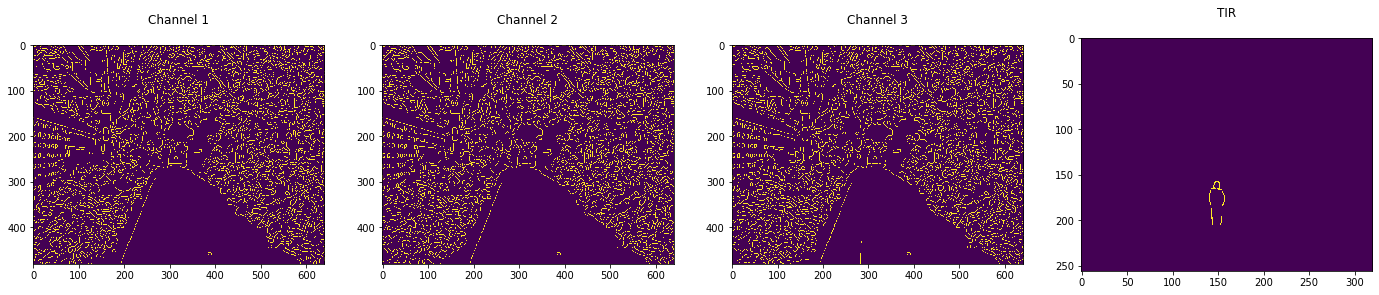

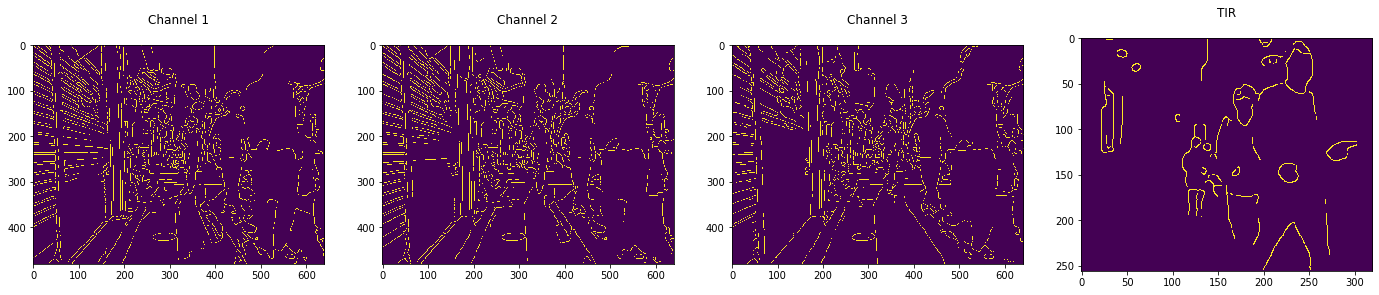

In [5]:
import skimage
import skimage.feature

# edge_day_r = skimage.filters.sobel(channel_day_r)
# edge_day_g = skimage.filters.sobel(channel_day_g)
# edge_day_b = skimage.filters.sobel(channel_day_b)
# edge_day_t = skimage.filters.sobel(im_day_t)
# edge_night_r = skimage.filters.sobel(channel_night_r)
# edge_night_g = skimage.filters.sobel(channel_night_g)
# edge_night_b = skimage.filters.sobel(channel_night_b)
# edge_night_t = skimage.filters.sobel(im_bright_t)

edge_day_r = skimage.feature.canny(channel_day_r, sigma=2.0)
edge_day_g = skimage.feature.canny(channel_day_g, sigma=2.0)
edge_day_b = skimage.feature.canny(channel_day_b, sigma=2.0)
edge_day_t = skimage.feature.canny(im_day_t, sigma=2.0)
edge_night_r = skimage.feature.canny(channel_night_r, sigma=2.0)
edge_night_g = skimage.feature.canny(channel_night_g, sigma=2.0)
edge_night_b = skimage.feature.canny(channel_night_b, sigma=2.0)
edge_night_t = skimage.feature.canny(im_bright_t, sigma=2.0)

fig_day, ax_day = plt.subplots(nrows=1, ncols=4, figsize = (24, 6))
ax_day[0].imshow(edge_day_r)
ax_day[0].set_title("Channel 1\n")
ax_day[1].imshow(edge_day_g)
ax_day[1].set_title("Channel 2\n")
ax_day[2].imshow(edge_day_b)
ax_day[2].set_title("Channel 3\n")
ax_day[3].imshow(edge_day_t)
ax_day[3].set_title("TIR\n")
plt.savefig('p1-3-1')
plt.show()
fig_night, ax_night = plt.subplots(nrows=1, ncols=4, figsize = (24, 6))
ax_night[0].imshow(edge_night_r)
ax_night[0].set_title("Channel 1\n")
ax_night[1].imshow(edge_night_g)
ax_night[1].set_title("Channel 2\n")
ax_night[2].imshow(edge_night_b)
ax_night[2].set_title("Channel 3\n")
ax_night[3].imshow(edge_night_t)
ax_night[3].set_title("TIR\n")
plt.savefig('p1-3-2')
plt.show()

利用 Canny 算子，将 RGB 三个通道的图像以及热红外图像进行边缘提取的操作后，如图，可以很好地看出热红外图像相较于 RGB 图像目标轮廓边缘更加清晰

HOG 特征是用来进行物体检测的特征描述子。在一副图像中，局部目标的表象和形状能够被梯度或边缘的方向密度分布很好地描述。HOG 特征的本质就在于梯度的统计信息，而梯度主要存在于边缘所在的地方。通过 Canny 算子，我们发现了热红外图像不同于 RGB 图像的细粒度特征：对背景不甚敏感。通过 HOG 特征，或许能够更加明显的表现出该独特性质。


/Users/kehanlin/opt/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


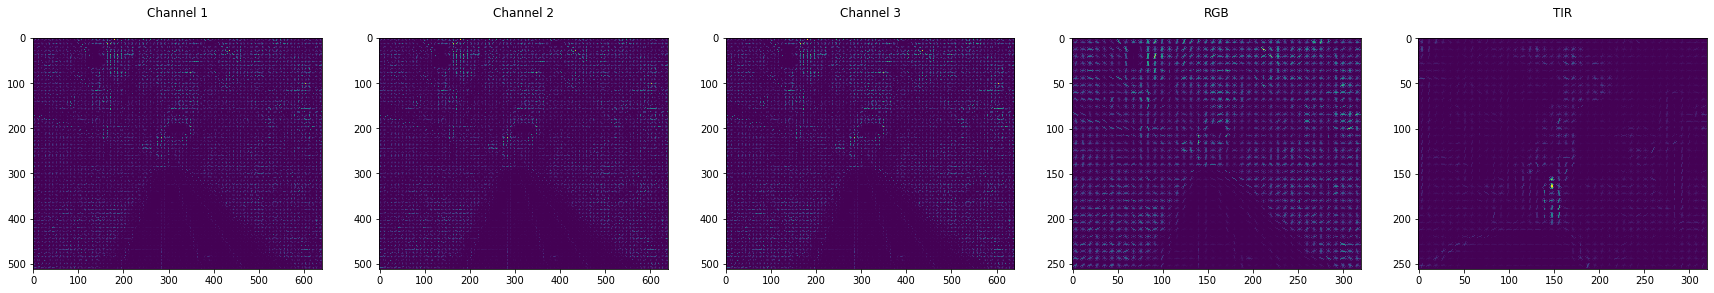

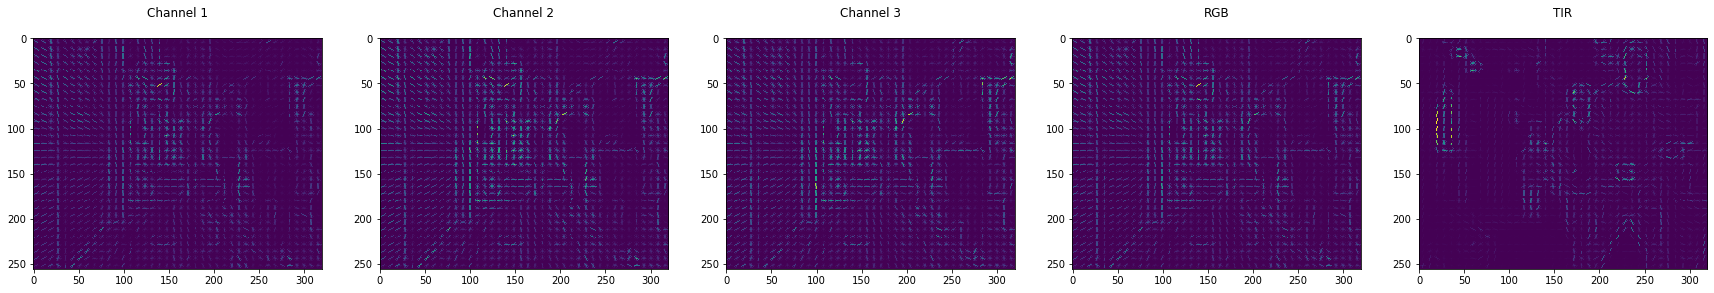

In [6]:
from skimage import transform

orient = 9
pix_per_cell = 8
cell_per_block = 16

hog_day_r_features, hog_day_r = skimage.feature.hog(transform.rescale(transform.resize(channel_day_r,(256, 320)),2),
                                                    orientations=orient, multichannel=False,
                                                    pixels_per_cell=(pix_per_cell, pix_per_cell),
                                                    cells_per_block=(cell_per_block, cell_per_block),
                                                    visualize=True, feature_vector=True)
hog_day_g_features, hog_day_g = skimage.feature.hog(transform.rescale(transform.resize(channel_day_g,(256, 320)),2), 
                                                    orientations=orient, multichannel=False,
                                                    pixels_per_cell=(pix_per_cell, pix_per_cell), 
                                                    cells_per_block=(cell_per_block, cell_per_block),
                                                    visualize=True, feature_vector=True)
hog_day_b_features, hog_day_b = skimage.feature.hog(transform.rescale(transform.resize(channel_day_b,(256, 320)),2),
                                                    orientations=orient, multichannel=False,
                                                    pixels_per_cell=(pix_per_cell, pix_per_cell),
                                                    cells_per_block=(cell_per_block, cell_per_block), 
                                                    visualize=True, feature_vector=True)
hog_day_rgb_features, hog_day_rgb = skimage.feature.hog(transform.resize(im_day_r,(256, 320)), 
                                                        orientations=orient, multichannel=True,
                                                        pixels_per_cell=(pix_per_cell, pix_per_cell), 
                                                        cells_per_block=(cell_per_block, cell_per_block), 
                                                        visualize=True, feature_vector=True)
hog_day_tir_features, hog_day_tir = skimage.feature.hog(im_day_t, orientations=orient, multichannel=False,
                                                        pixels_per_cell=(pix_per_cell, pix_per_cell), 
                                                        cells_per_block=(cell_per_block, cell_per_block), 
                                                        visualize=True, feature_vector=True)

hog_night_r_features, hog_night_r = skimage.feature.hog(transform.resize(channel_night_r,(256, 320)), 
                                                        orientations=orient, multichannel=False, 
                                                        pixels_per_cell=(pix_per_cell, pix_per_cell), 
                                                        cells_per_block=(cell_per_block, cell_per_block), 
                                                        visualize=True, feature_vector=True)
hog_night_g_features, hog_night_g = skimage.feature.hog(transform.resize(channel_night_g,(256, 320)), 
                                                        orientations=orient, multichannel=False, 
                                                        pixels_per_cell=(pix_per_cell, pix_per_cell), 
                                                        cells_per_block=(cell_per_block, cell_per_block), 
                                                        visualize=True, feature_vector=True)
hog_night_b_features, hog_night_b = skimage.feature.hog(transform.resize(channel_night_b,(256, 320)), 
                                                        orientations=orient, multichannel=False,
                                                        pixels_per_cell=(pix_per_cell, pix_per_cell),
                                                        cells_per_block=(cell_per_block, cell_per_block), 
                                                        visualize=True, feature_vector=True)
hog_night_rgb_features, hog_night_rgb = skimage.feature.hog(transform.resize(im_bright_r,(256, 320)), 
                                                            orientations=orient, multichannel=True, 
                                                            pixels_per_cell=(pix_per_cell, pix_per_cell), 
                                                            cells_per_block=(cell_per_block, cell_per_block),
                                                            visualize=True, feature_vector=True)
hog_night_tir_features, hog_night_tir = skimage.feature.hog(im_bright_t, orientations=orient, multichannel=False,
                                                            pixels_per_cell=(pix_per_cell, pix_per_cell),
                                                            cells_per_block=(cell_per_block, cell_per_block), 
                                                            visualize=True, feature_vector=True)

fig_day, ax_day = plt.subplots(nrows=1, ncols=5, figsize = (30, 6))
ax_day[0].imshow(hog_day_r)
ax_day[0].set_title("Channel 1\n")
ax_day[1].imshow(hog_day_g)
ax_day[1].set_title("Channel 2\n")
ax_day[2].imshow(hog_day_b)
ax_day[2].set_title("Channel 3\n")
ax_day[3].imshow(hog_day_rgb)
ax_day[3].set_title("RGB\n")
ax_day[4].imshow(hog_day_tir)
ax_day[4].set_title("TIR\n")
plt.savefig('p1-4-1')
plt.show()
fig_night, ax_night = plt.subplots(nrows=1, ncols=5, figsize = (30, 6))
ax_night[0].imshow(hog_night_r)
ax_night[0].set_title("Channel 1\n")
ax_night[1].imshow(hog_night_g)
ax_night[1].set_title("Channel 2\n")
ax_night[2].imshow(hog_night_b)
ax_night[2].set_title("Channel 3\n")
ax_night[3].imshow(hog_night_rgb)
ax_night[3].set_title("RGB\n")
ax_night[4].imshow(hog_night_tir)
ax_night[4].set_title("TIR\n")
plt.savefig('p1-4-2')
plt.show()

经过 HOG 特征提取过后，热红外图像对背景不敏感这一细粒度特征表现得更加突出，RGB 图像中的目标可能会“消失”在背景一片杂乱的边缘之中，而热红外图像中目标在图像中的方位、轮廓依然清晰，能够获得目标判别性较强的特征。

以白天的一组照片为例，将目标单独截取出来进行局部 HOG 特征的提取，结果如下：

In [7]:
from PIL import Image
from skimage import transform, feature

target_t = Image.open('./data/TIR/TIR003.png')
cropped_t = target_t.crop((138, 155, 158, 205))  # (left, upper, right, lower)
target_t = np.array(cropped_t)
target_t = transform.resize(target_t,(128,64))
print(target_t.shape)

target_r = Image.open('./data/RGB/RGB003.png')
cropped_r = target_r.crop((278, 208, 303, 268))  # (left, upper, right, lower)
target_r = np.array(cropped_r)
target_r = transform.resize(target_r,(128,64))
print(target_r.shape)

(128, 64)
(128, 64, 3)


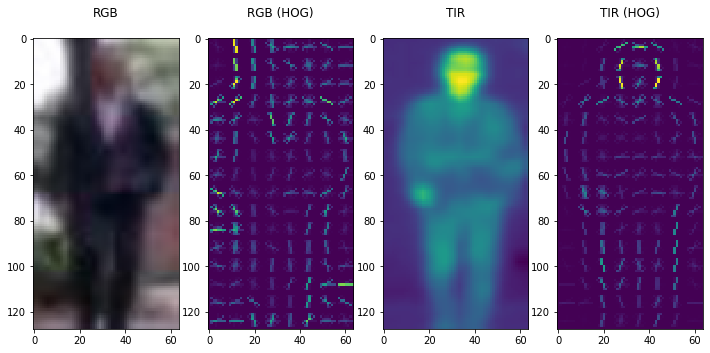

In [8]:
orient = 9
pix_per_cell = 8
cell_per_block = 2

hog_day_target_r_features, hog_day_target_r = feature.hog(target_r, orientations=orient, multichannel=True,
                                                    pixels_per_cell=(pix_per_cell, pix_per_cell),
                                                    cells_per_block=(cell_per_block, cell_per_block),
                                                    visualize=True, feature_vector=False)
hog_day_target_t_features, hog_day_target_t = feature.hog(target_t, orientations=orient, multichannel=False,
                                                    pixels_per_cell=(pix_per_cell, pix_per_cell),
                                                    cells_per_block=(cell_per_block, cell_per_block),
                                                    visualize=True, feature_vector=False)

fig_target_day, ax_target_day = plt.subplots(nrows=1, ncols=4, figsize = (12, 6))
ax_target_day[0].imshow(target_r)
ax_target_day[0].set_title("RGB\n")
ax_target_day[1].imshow(hog_day_target_r)
ax_target_day[1].set_title("RGB (HOG)\n")
ax_target_day[2].imshow(target_t)
ax_target_day[2].set_title("TIR\n")
ax_target_day[3].imshow(hog_day_target_t)
ax_target_day[3].set_title("TIR (HOG)\n")
plt.savefig('p1-5')
plt.show()

从图像来看，热红外图像的 HOG 图形上类间区别（如目标的头部、躯干与背景之间的差别）要比 RGB 图像来的明显，而类内区别（如目标的着装）要略微弱于 RGB 图像。

In [9]:
print(hog_day_target_t_features.shape)

(15, 7, 2, 2, 9)


除了视觉上的差异，热红外图像与 RGB 图像在 HOG 特征的定量比较中也存在一些较大的差异。当 RGB 图像中目标与背景的对比不够强烈的情况下，选取目标右脸颊边缘的一个Block（在Scikit-image包的HOG计算中，将一张分为若干个Block,再将Block分为若干个Cell进行计算）为例，截取如下：

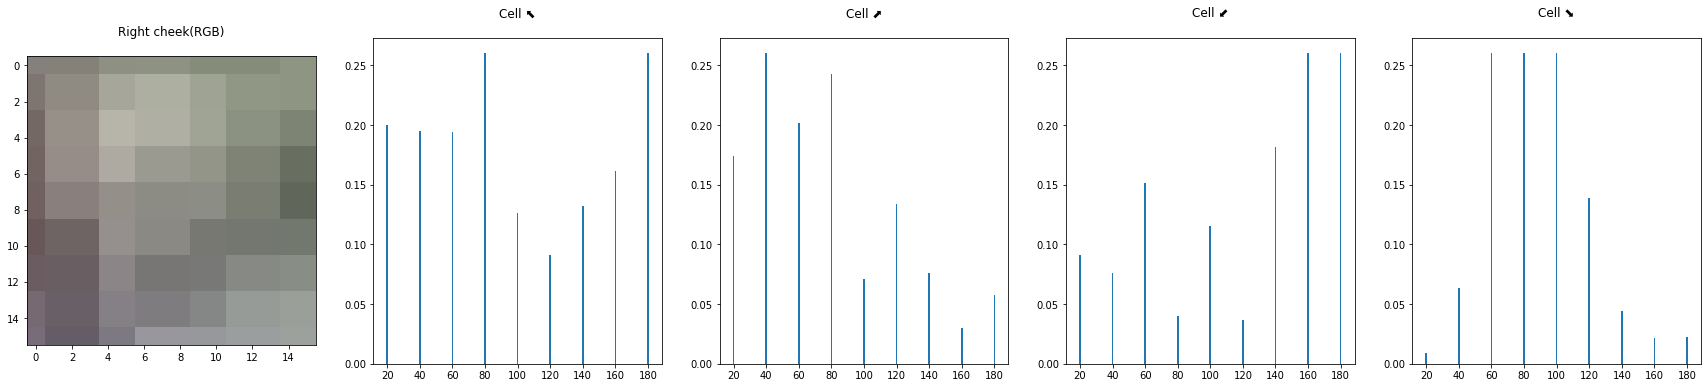

In [10]:
exm_r = Image.open('./data/RGB/RGB003.png')
exm_r = exm_r.crop((278, 208, 303, 268))  # (left, upper, right, lower)
exm_r = exm_r.resize((64,128))
exm_r = exm_r.crop((40, 8, 56, 24))  # (left, upper, right, lower)
exm_r = np.array(exm_r)

angles = np.array([20,40,60,80,100,120,140,160,180])
fig_r, ax_r = plt.subplots(nrows=1, ncols=5, figsize = (30, 6))
ax_r[0].imshow(exm_r)
ax_r[0].set_title("Right cheek(RGB)\n")
ax_r[1].bar(angles,hog_day_target_r_features[1][5][0][0], 1)
ax_r[1].set_title("Cell ⬉\n")
ax_r[2].bar(angles,hog_day_target_r_features[1][5][0][1], 1)
ax_r[2].set_title("Cell ⬈\n")
ax_r[3].bar(angles,hog_day_target_r_features[1][5][1][0], 1)
ax_r[3].set_title("Cell ⬋\n")
ax_r[4].bar(angles,hog_day_target_r_features[1][5][1][1], 1)
ax_r[4].set_title("Cell ⬊\n")
plt.savefig('p1-6-1')
plt.show()

可以发现，在 RGB 图像中，将这个 Block 分为4个8$\times$8的Cell后，左上的 Cell 倾向于60～80度或160～180度的角度区间，右上的 Cell 倾向于20～40度的角度区间，左下的 Cell 倾向于140～180度的角度区间，右下的 Cell 倾向于40～100度的角度区间。4个 Cell 中各个 Cell 的梯度大小范围几乎一致，没有明显的边界的特点。

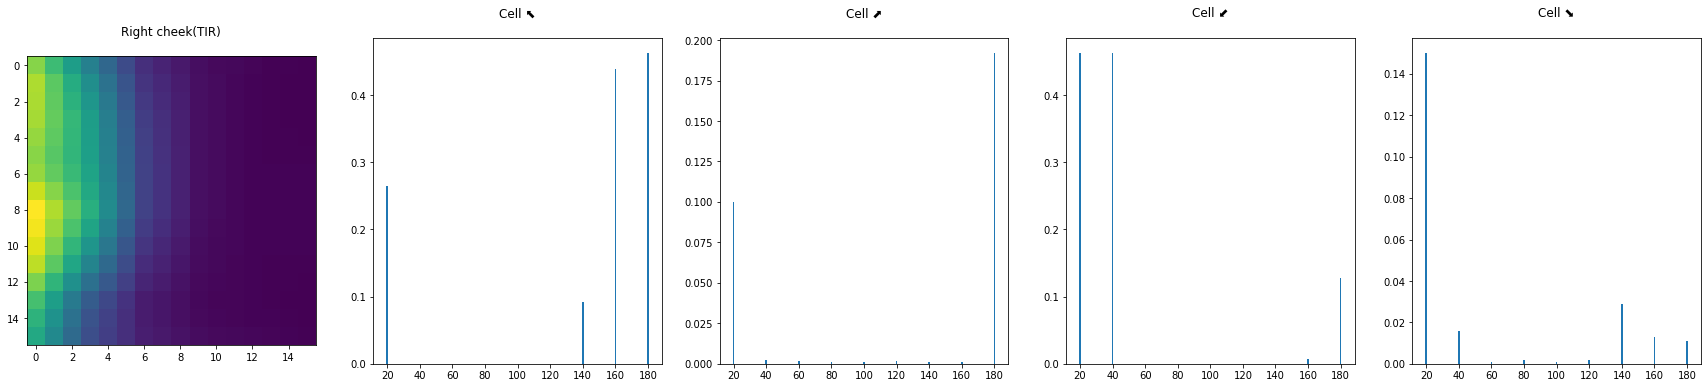

In [11]:
exm_t = Image.fromarray(target_t)
exm_t = exm_t.crop((40, 8, 56, 24))  # (left, upper, right, lower)
exm_t = np.array(exm_t)

angles = np.array([20,40,60,80,100,120,140,160,180])
fig_t, ax_t = plt.subplots(nrows=1, ncols=5, figsize = (30, 6))
ax_t[0].imshow(exm_t)
ax_t[0].set_title("Right cheek(TIR)\n")
ax_t[1].bar(angles,hog_day_target_t_features[1][5][0][0], 1)
ax_t[1].set_title("Cell ⬉\n")
ax_t[2].bar(angles,hog_day_target_t_features[1][5][0][1], 1)
ax_t[2].set_title("Cell ⬈\n")
ax_t[3].bar(angles,hog_day_target_t_features[1][5][1][0], 1)
ax_t[3].set_title("Cell ⬋\n")
ax_t[4].bar(angles,hog_day_target_t_features[1][5][1][1], 1)
ax_t[4].set_title("Cell ⬊\n")
plt.savefig('p1-6-2')
plt.show()

而在热红外图像中，将这个 Block 分为4个8$\times$8的Cell后，左上的 Cell 倾向于140～180度的角度区间，右上的 Cell 倾向于0～20或160～180的角度区间，左下的 Cell 倾向于140～180度的角度区间，右下的 Cell 倾向于40～100度的角度区间。4个 Cell 中左侧两个 Cell 存在较大的梯度，而右侧两个的梯度较小。可以据此推断出左侧与右侧存在目标与背景的对比关系。

当 RGB 图像中目标与背景的对比足够强烈的情况下，选取目标右侧腿部边缘的一个Block为例，截取如下：

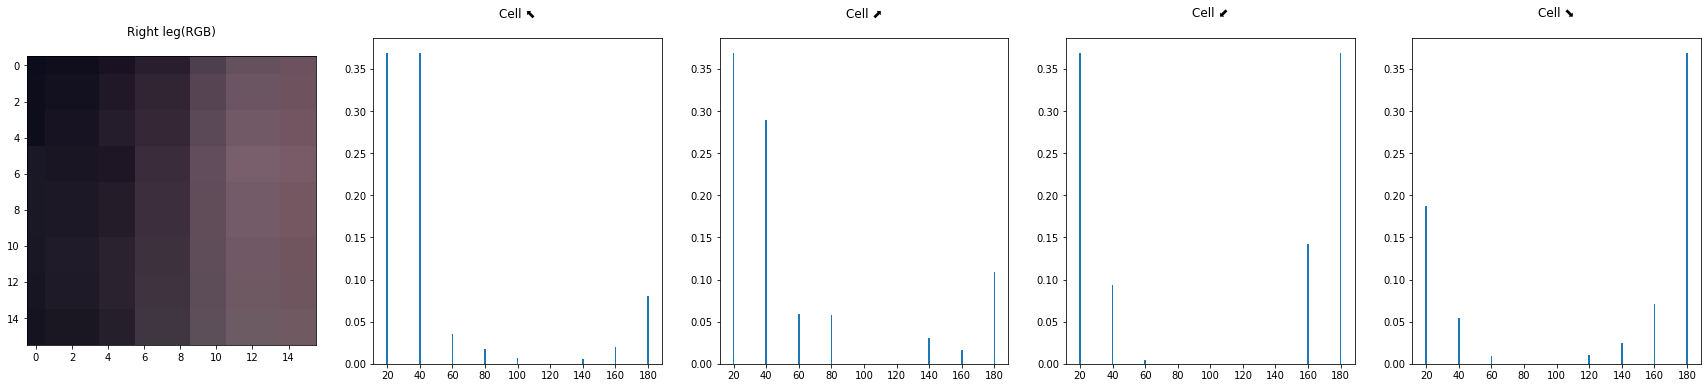

In [12]:
exm_r2 = Image.open('./data/RGB/RGB003.png')
exm_r2 = exm_r2.crop((278, 208, 303, 268))  # (left, upper, right, lower)
exm_r2 = exm_r2.resize((64,128))
exm_r2 = exm_r2.crop((40, 80, 56, 96))  # (left, upper, right, lower)
exm_r2 = np.array(exm_r2)

angles = np.array([20,40,60,80,100,120,140,160,180])
fig_r2, ax_r2 = plt.subplots(nrows=1, ncols=5, figsize = (30, 6))
ax_r2[0].imshow(exm_r2)
ax_r2[0].set_title("Right leg(RGB)\n")
ax_r2[1].bar(angles,hog_day_target_r_features[10][5][0][0], 1)
ax_r2[1].set_title("Cell ⬉\n")
ax_r2[2].bar(angles,hog_day_target_r_features[10][5][0][1], 1)
ax_r2[2].set_title("Cell ⬈\n")
ax_r2[3].bar(angles,hog_day_target_r_features[10][5][1][0], 1)
ax_r2[3].set_title("Cell ⬋\n")
ax_r2[4].bar(angles,hog_day_target_r_features[10][5][1][1], 1)
ax_r2[4].set_title("Cell ⬊\n")
plt.savefig('p1-6-3')
plt.show()

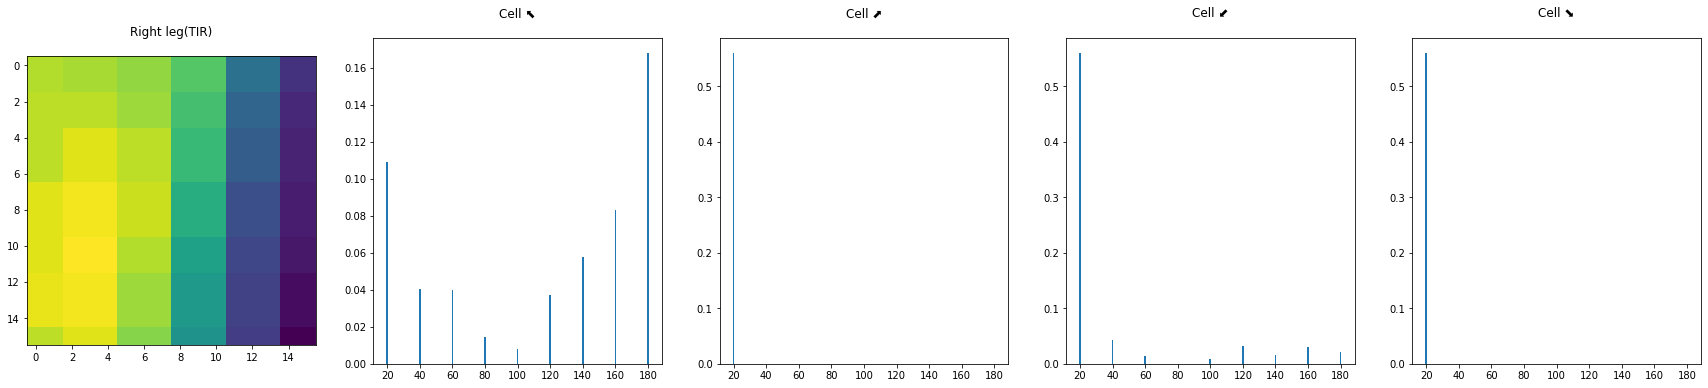

In [13]:
exm_t2 = Image.open('./data/TIR/TIR003.png')
exm_t2 = exm_t2.crop((138, 155, 158, 205))  # (left, upper, right, lower)
exm_t2 = exm_t2.resize((64,128))
exm_t2 = exm_t2.crop((40, 80, 56, 96))  # (left, upper, right, lower)
exm_t2 = np.array(exm_t2)

angles = np.array([20,40,60,80,100,120,140,160,180])
fig_t2, ax_t2 = plt.subplots(nrows=1, ncols=5, figsize = (30, 6))
ax_t2[0].imshow(exm_t2)
ax_t2[0].set_title("Right leg(TIR)\n")
ax_t2[1].bar(angles,hog_day_target_t_features[10][5][0][0], 1)
ax_t2[1].set_title("Cell ⬉\n")
ax_t2[2].bar(angles,hog_day_target_t_features[10][5][0][1], 1)
ax_t2[2].set_title("Cell ⬈\n")
ax_t2[3].bar(angles,hog_day_target_t_features[10][5][1][0], 1)
ax_t2[3].set_title("Cell ⬋\n")
ax_t2[4].bar(angles,hog_day_target_t_features[10][5][1][1], 1)
ax_t2[4].set_title("Cell ⬊\n")
plt.savefig('p1-6-4')
plt.show()

相互比较，RGB 图像该 Block 的每个 Cell 梯度方向与热红外图像相同位置的 Block 的每个 Cell 梯度方向基本一致，都能够较为明显的判断出目标与背景的关系。

因此，通过上面整体到局部的对比，热红外图像相比于 RGB 图像，在不受其他热源干扰的情况下，能够更好的区分目标（主要为行人、车辆等）与背景。此外，由于缺少颜色信息，热红外图像在类内区分的表现稍差于 RGB 图像，主要表现在目标细粒度特征的判别性较弱。因而我们可以通过热红外图像这一特性，利用卷积神经网络去发掘热红外图像中目标的更细粒度的、判别性更强的特征，以此优化热红外图像序列中目标追踪的表现。